In [2]:
import os
from PIL import Image

carpeta_entrenamiento = './dataset/A'

num_corruptas = 0
for carpeta_raiz, carpetas, archivos in os.walk(carpeta_entrenamiento):
    for archivo in archivos:
        ruta_archivo = os.path.join(carpeta_raiz, archivo)
        try:
            with Image.open(ruta_archivo) as img:
                img.verify()
        except (IOError, SyntaxError):
            print(f"Eliminando archivo corrupto: {ruta_archivo}")
            os.remove(ruta_archivo)
            num_corruptas += 1

print(f"Archivos corruptos eliminados: {num_corruptas}")

Archivos corruptos eliminados: 0


In [3]:
import os
from PIL import Image

carpeta_entrenamiento = './dataset/B'

num_corruptas = 0
for carpeta_raiz, carpetas, archivos in os.walk(carpeta_entrenamiento):
    for archivo in archivos:
        ruta_archivo = os.path.join(carpeta_raiz, archivo)
        try:
            with Image.open(ruta_archivo) as img:
                img.verify()
        except (IOError, SyntaxError):
            print(f"Eliminando archivo corrupto: {ruta_archivo}")
            os.remove(ruta_archivo)
            num_corruptas += 1

print(f"Archivos corruptos eliminados: {num_corruptas}")

Archivos corruptos eliminados: 0


In [4]:
import os
from PIL import Image

carpeta_entrenamiento = './dataset/C'

num_corruptas = 0
for carpeta_raiz, carpetas, archivos in os.walk(carpeta_entrenamiento):
    for archivo in archivos:
        ruta_archivo = os.path.join(carpeta_raiz, archivo)
        try:
            with Image.open(ruta_archivo) as img:
                img.verify()
        except (IOError, SyntaxError):
            print(f"Eliminando archivo corrupto: {ruta_archivo}")
            os.remove(ruta_archivo)
            num_corruptas += 1

print(f"Archivos corruptos eliminados: {num_corruptas}")

Archivos corruptos eliminados: 0


In [5]:
#Aumento de datos
#Generar imagenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255, #Normalizarlas
    rotation_range = 10, #rotar un angulo de 10 grados (ambos lados)
    width_shift_range=0.15,
    height_shift_range = 0.15,
    shear_range = 5, #deforme un poco
    zoom_range = [0.7, 1.3], #se aleje en 0.7 o un zoom de 1,3
    validation_split = 0.2 # 20% de las imagenes sean para las pruebas
)

#shuffle (mezclar constantemente)
data_gen_entrenamiento = datagen.flow_from_directory("dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training",
                                                     class_mode='categorical') # Cambiado a 'categorical'
#20% de entrenamiento
data_gen_pruebas = datagen.flow_from_directory("dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation",
                                                     class_mode='categorical') # Cambiado a 'categorical'

Found 152 images belonging to 19 classes.


Found 38 images belonging to 19 classes.


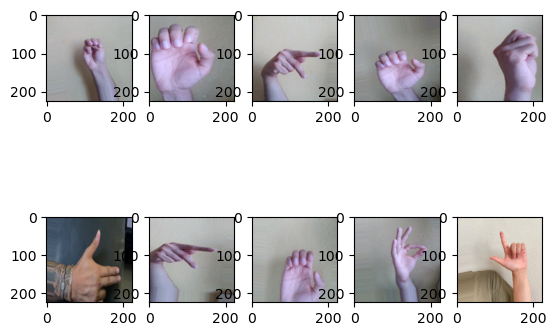

In [6]:
#Ver como quedaron tranformadas las imagenes
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [7]:
import tensorflow as tf
import tensorflow_hub as hub #hub existen muchos modelos pre -entrenados
#https://www.tensorflow.org/hub

url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [8]:
mobilenetv2 = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),  # Ajusta según tu dataset
    include_top=False,          # Remueve la capa densa original
    weights='imagenet'          # Usa pesos pre-entrenados de ImageNet
)

In [9]:
#ultima capa al modelo (2 capas)
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(19, activation="softmax") # Cambiado de 2 a 3 unidades
])

In [10]:
modelo.compile(
    loss='categorical_crossentropy', # Cambiado a 'categorical_crossentropy'
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelo = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(19, activation='softmax')  # 3 clases: A, B, C
])

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
modelo.fit(data_gen_entrenamiento, validation_data=data_gen_pruebas, epochs=10)

# Guardar el modelo
modelo.save("modelo_entrenado.h5")


c:\Users\Chandy\anaconda3\envs\lenguaje\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Chandy\anaconda3\envs\lenguaje\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.0115 - loss: 36.3536 - val_accuracy: 0.0526 - val_loss: 23.6909
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.0189 - loss: 20.9221 - val_accuracy: 0.0789 - val_loss: 7.0384
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.0851 - loss: 5.8188 - val_accuracy: 0.0789 - val_loss: 3.3195
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.0985 - loss: 3.1023 - val_accuracy: 0.0526 - val_loss: 2.9107
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.0436 - loss: 2.9254 - val_accuracy: 0.0526 - val_loss: 2.9047
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.0509 - loss: 2.9265 - val_accuracy: 0.0526 - val_loss: 2.9894
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.0421 - loss: 2.9183 - val_accuracy: 0.0526 - val_loss: 2.8520
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.0436 - loss: 2.8636 - val_accuracy: 0.1053 - val_loss: 2.7625
Epoch

In [12]:
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# Cargar el modelo
try:
    modelo = load_model("modelo_entrenado.h5")
    print("✅ Modelo cargado correctamente.")
except Exception as e:
    print(f"❌ Error al cargar el modelo: {e}")
    exit()

def take_photo(filename='photo.jpg'):
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)  # <- CAP_DSHOW para Windows

    if not cap.isOpened():
        print("❌ No se pudo acceder a la cámara.")
        return None

    print("📸 Presiona 's' para capturar o 'q' para cancelar.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Error al capturar el frame.")
            break

        cv2.imshow('Ventana de Captura - Presiona s o q', frame)
        key = cv2.waitKey(1)

        if key == ord('s'):
            cv2.imwrite(filename, frame)
            print(f"✅ Imagen guardada como {filename}")
            break
        elif key == ord('q'):
            print("⛔ Operación cancelada por el usuario.")
            filename = None
            break

    cap.release()
    cv2.destroyAllWindows()
    return filename

def categorizar(ruta):
    try:
        img = Image.open(ruta).convert("RGB")
        img = img.resize((224, 224))
        img = np.array(img).astype("float32") / 255.0
        prediccion = modelo.predict(img.reshape(1, 224, 224, 3))
        return np.argmax(prediccion[0]), prediccion[0]
    except Exception as e:
        print(f"❌ Error al clasificar la imagen: {e}")
        return None, None

# MAIN
photo_path = take_photo()

if photo_path and os.path.exists(photo_path):
    img = Image.open(photo_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Imagen capturada")
    plt.show()

    pred_idx, scores = categorizar(photo_path)
    clases = ['A', 'B', 'C']

    if pred_idx is not None and pred_idx < len(clases):
        print(f"🔍 Predicción: {clases[pred_idx]} (Confianza: {scores[pred_idx]:.2%})")
    else:
        print("⚠️ No se pudo determinar la clase de la imagen.")
else:
    print("⚠️ No se capturó ninguna imagen.")


✅ Modelo cargado correctamente.
📸 Presiona 's' para capturar o 'q' para cancelar.
⛔ Operación cancelada por el usuario.
⚠️ No se capturó ninguna imagen.


In [13]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224, 224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [14]:
import cv2

def take_photo(filename='photo.jpg'):
    cap = cv2.VideoCapture(0)  # Usa la webcam

    if not cap.isOpened():
        print("No se pudo acceder a la cámara.")
        return None

    print("Presiona 's' para capturar la imagen o 'q' para salir.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error al leer la cámara.")
            break

        cv2.imshow('Presiona "s" para capturar', frame)

        key = cv2.waitKey(1)
        if key == ord('s'):
            cv2.imwrite(filename, frame)
            print(f"Imagen guardada como {filename}")
            break
        elif key == ord('q'):
            print("Captura cancelada.")
            break

    cap.release()
    cv2.destroyAllWindows()
    return filename
